In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten

In [2]:
data = np.load('./Image_Classification/mnist_compressed.npz')

X_test, y_test, X_train, y_train =  data['test_images'], data['test_labels'], data['train_images'], data['train_labels']

In [3]:
X_train.shape

(60000, 28, 56)

In [165]:
test_full_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10)

In [ ]:
def show_img(x, y):
    plt.gray()
    plt.title(str(y))
    plt.imshow(x)


def divide_into_train_and_val(train_dataset_original, train_ratio = 0.8, val_ratio = 0.2):
    """
        pass the train dataset we will use
        train as -> train and val
        train will be divided into
        80% train and 20% val
    """
    DATASET_SIZE = len(train_dataset_original)

    train_dataset = train_dataset_original.take(int(train_ratio * DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (28 , 56 , 1)) 
            , y
        )
    ).batch(32)

    val_dataset = train_dataset_original.skip(int(train_ratio * DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (28 , 56 , 1)) 
            , y
        )
    ).batch(32)

    return train_dataset, val_dataset

In [167]:
train_dataset , val_dataset = divide_into_train_and_val(train)

In [168]:
model = Sequential([
    Conv2D(filters = 8, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu', input_shape = (28, 56, 1)),
    MaxPool2D(pool_size = (2 , 2), strides = 2),
    
    Conv2D(filters = 16, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2 , 2), strides = 2),
    
    Flatten(),
    Dense(100, activation = 'softmax')
])

d:\College\pccoe\5th sem\CV\Practicals\Final_practicals\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [170]:
model.fit(train_dataset, validation_data = val_dataset, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4561 - loss: 5.7748 - val_accuracy: 0.8242 - val_loss: 0.5787
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8705 - loss: 0.4189 - val_accuracy: 0.8644 - val_loss: 0.4679
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9246 - loss: 0.2408 - val_accuracy: 0.8729 - val_loss: 0.5010
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9466 - loss: 0.1590 - val_accuracy: 0.8721 - val_loss: 0.5341
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9575 - loss: 0.1272 - val_accuracy: 0.8781 - val_loss: 0.5907
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9684 - loss: 0.0922 - val_accuracy: 0.8835 - val_loss: 0.5635
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9701 - loss: 0.0854 - val_accuracy: 0.8897 - val_loss: 0.5976
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9759 - loss: 0.0700 - 

class = 48 conf= 1.0


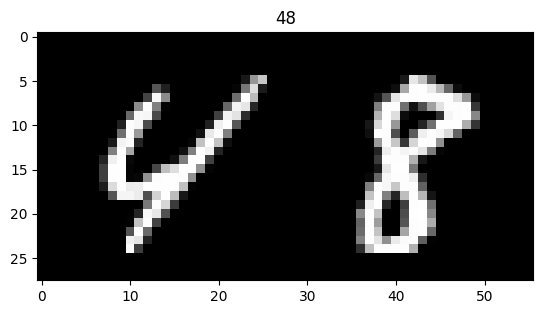

In [176]:
x = X_test[69]
y = y_test[69]
show_img(x , y)
x = x.reshape(1, 28, 56, 1)
predictions = model.predict(x, verbose=0)
# Get predicted class and confidence
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]
print('class =', predicted_class, 'conf=' , confidence)

In [179]:
model.save('./mnist_trained_weights.keras')